Code for **"Inpainting"** figures $6$, $8$ and 7 (top) from the main paper.

In [ ]:
!git clone https://github.com/DmitryUlyanov/deep-image-prior
!mv deep-image-prior/* ./

fatal: destination path 'deep-image-prior' already exists and is not an empty directory.
mv: cannot stat 'deep-image-prior/*': No such file or directory


# Import libs

In [ ]:
from __future__ import print_function
import matplotlib.pyplot as plt
%matplotlib inline

import os
# os.environ['CUDA_VISIBLE_DEVICES'] = '1'

import numpy as np
from models.resnet import ResNet
from models.unet import UNet
from models.skip import skip
import torch
import torch.optim

from utils.inpainting_utils import *

torch.backends.cudnn.enabled = True
torch.backends.cudnn.benchmark =True
dtype = torch.cuda.FloatTensor

PLOT = True
imsize = -1
dim_div_by = 64

# Choose figure

In [ ]:
## Fig 6
# img_path  = 'data/inpainting/vase.png'
# mask_path = 'data/inpainting/vase_mask.png'

## Fig 8
# img_path  = 'data/inpainting/library.png'
# mask_path = 'data/inpainting/library_mask.png'

## Fig 7 (top)
img_path  = 'data/inpainting/kate.png'
mask_path = 'data/inpainting/kate_mask.png'

# Another text inpainting example
# img_path  = 'data/inpainting/peppers.png'
# mask_path = 'data/inpainting/peppers_mask.png'

NET_TYPE = 'UNET' # one of skip_depth4|skip_depth2|UNET|ResNet

# Load mask

In [ ]:
img_pil, img_np = get_image(img_path, imsize)
img_mask_pil, img_mask_np = get_image(mask_path, imsize)

### Center crop

In [ ]:
img_mask_pil = crop_image(img_mask_pil, dim_div_by)
img_pil      = crop_image(img_pil,      dim_div_by)

img_np      = pil_to_np(img_pil)
img_mask_np = pil_to_np(img_mask_pil)

(512, 512)
<PIL.Image.Image image mode=RGB size=512x512 at 0x7ACE3C8E7700>


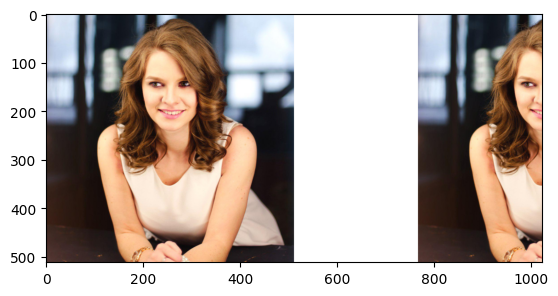

In [ ]:
# library
from PIL import Image
import matplotlib.pyplot as plt

# opening up of images
img = Image.open('data/inpainting/kate.png')
img1 =Image.open('data/inpainting/kate_mask.png')
# img = Image.open("logo.png")
# img1 = Image.open("logo2.png")
print(img.size)
img1.size
img_size = img.resize((512,512))
img1_size = img1.resize((512,512))
print(img_size)
# creating a new image and pasting
# the images
im3=Image.new("RGB", (1024, 512), "white")
img2 = Image.new("RGB", (1024, 512), "white")

# pasting the first image (image_name,
# (position))
img2.paste(img_size, (0, 0))
im3.paste(img1_size, (0, 0))

# pasting the second image (image_name,
# (position))
img2.paste(img_size, (768, 0))
im3.paste(img1_size, (512, 0))

plt.imshow(img2)


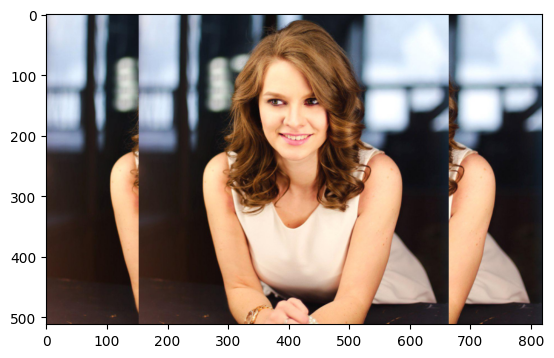

In [ ]:
from PIL import Image

# Open the image file
image_path = "/content/data/inpainting/kate.png"
original_image = Image.open(image_path)
width, height = original_image.size
roi_left = 0
roi_right = int(0.3 * width)
cropped_left = original_image.crop((roi_left, 0, roi_right, height))
roi_left2 = int(0.7 * width)
roi_right2 = width
cropped_right = original_image.crop((roi_left2, 0, roi_right2, height))




image1 = cropped_left
image2 = original_image
image3 = cropped_right

height = image1.size[1]


width1 = image1.size[0]
width2 = image2.size[0]
width3 = image3.size[0]

total_width = width1 + width2 + width3


concatenated_image = Image.new("RGB", (total_width, height))


concatenated_image.paste(image1, (0, 0))
concatenated_image.paste(image2, (width1, 0))
concatenated_image.paste(image3, (width1 + width2, 0))

concatenated_image.show()
plt.imshow(concatenated_image)



In [ ]:
img_np= pil_to_np(concatenated_image)
img_mask_np = pil_to_np(concatenated_image)

In [ ]:
print(img_mask_np.)

AttributeError: 'numpy.ndarray' object has no attribute 'type'

### Visualize

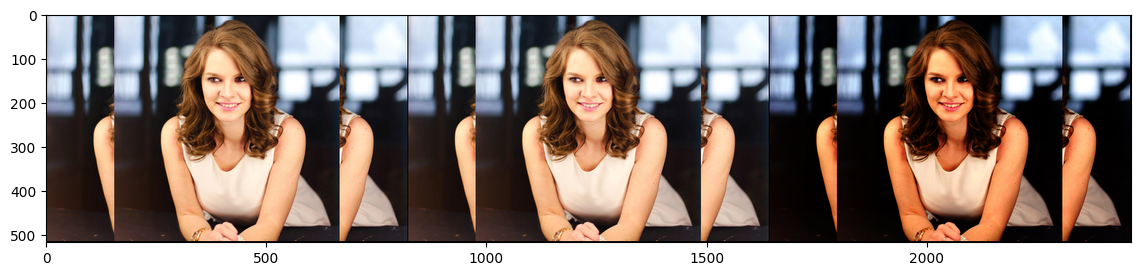

In [ ]:
img_mask_var = np_to_torch(img_mask_np).type(dtype)

plot_image_grid([img_np, img_mask_np, img_mask_np*img_np], 3,11);

# Setup

In [ ]:
pad = 'reflection' # 'zero'
OPT_OVER = 'net'
OPTIMIZER = 'adam'

In [ ]:


if ('kate.png' in img_path) or ('peppers.png' in img_path):
    # Same params and net as in super-resolution and denoising
    INPUT = 'noise'
    input_depth = 32
    LR = 0.01
    num_iter = 6001
    param_noise = False
    show_every = 50
    figsize = 5
    reg_noise_std = 0.03

    net = skip(input_depth, img_np.shape[0],
               num_channels_down = [128] * 5,
               num_channels_up =   [128] * 5,
               num_channels_skip =    [128] * 5,
               filter_size_up = 3, filter_size_down = 3,
               upsample_mode='nearest', filter_skip_size=1,
               need_sigmoid=True, need_bias=True, pad=pad, act_fun='LeakyReLU').type(dtype)

else:
    assert False

net = net.type(dtype)
net_input = get_noise(input_depth, INPUT, img_np.shape[1:]).type(dtype)

In [ ]:
# Compute number of parameters
s  = sum(np.prod(list(p.size())) for p in net.parameters())
print ('Number of params: %d' % s)

# Loss
mse = torch.nn.MSELoss().type(dtype)

img_var = np_to_torch(img_np).type(dtype)
mask_var = np_to_torch(img_mask_np).type(dtype)

Number of params: 3002627


# Main loop

Starting optimization with ADAM


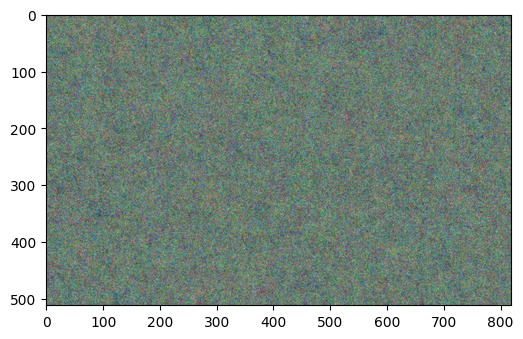

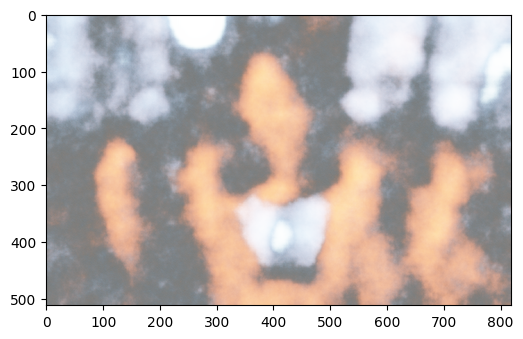

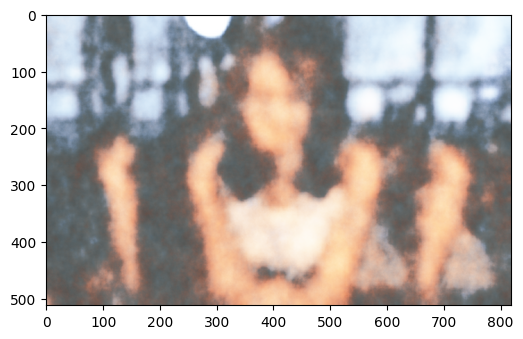

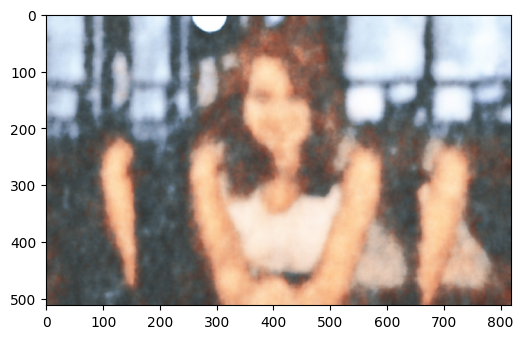

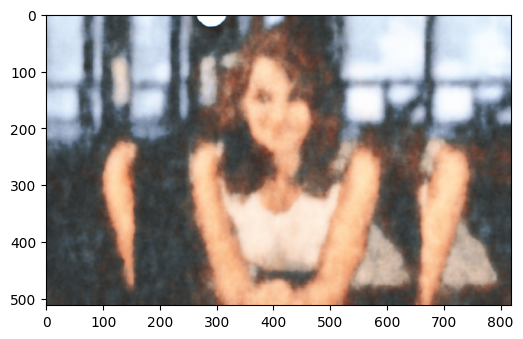

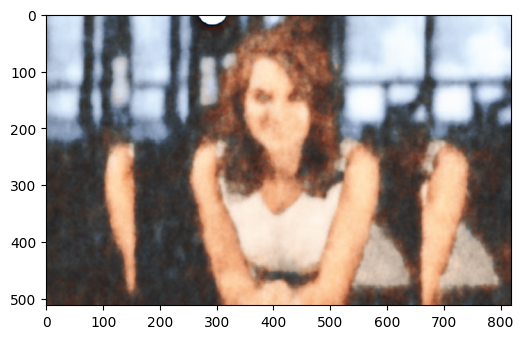

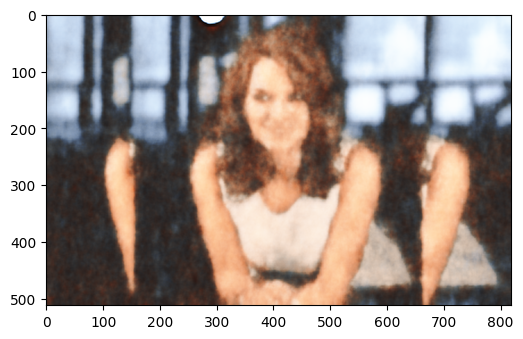

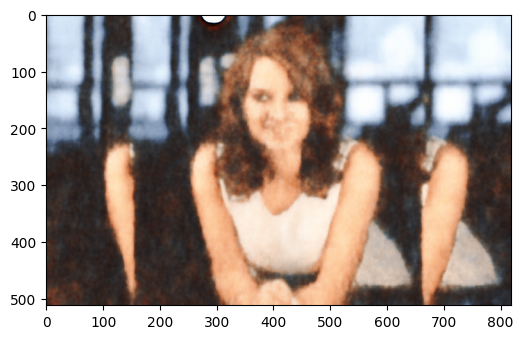

KeyboardInterrupt: 

In [ ]:
i = 0
def closure():

    global i

    if param_noise:
        for n in [x for x in net.parameters() if len(x.size()) == 4]:
            n = n + n.detach().clone().normal_() * n.std() / 50

    net_input = net_input_saved
    if reg_noise_std > 0:
        net_input = net_input_saved + (noise.normal_() * reg_noise_std)


    out = net(net_input)

    total_loss = mse(out * mask_var, img_var * mask_var)
    total_loss.backward()

    print ('Iteration %05d    Loss %f' % (i, total_loss.item()), '\r', end='')
    if  PLOT and i % show_every == 0:
        out_np = torch_to_np(out)
        plot_image_grid([np.clip(out_np, 0, 1)], factor=figsize, nrow=1)

    i += 1

    return total_loss

net_input_saved = net_input.detach().clone()
noise = net_input.detach().clone()

p = get_params(OPT_OVER, net, net_input)
optimize(OPTIMIZER, p, closure, LR, num_iter)

In [ ]:
out_np = torch_to_np(net(net_input))
plot_image_grid([out_np], factor=5);